In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt



#np.set_printoptions(precision=4)
import math
from utils import *

nS = 350
nA = 2
seed = get_current_seed()
seed = 47146882006333120128184314011326542902
gamma = .9
mu = np.ones(nS) * 1/nS
river = River(nS, mu, small=5, large=1000, seed=seed)
tau = 1.
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
mdp = TMDP(river, xi, tau=0., gamma=gamma, seed=seed)
tmdp_1 = TMDP(river, xi, tau=.5, gamma=gamma, seed=seed)


Current seed for result reproducibility: 47146882006333120128184314011326542902


In [2]:
q_c = np.zeros((nS, nA))
tmdp.reset()
cur_res = curriculum_Q_learning(tmdp, q_c, alpha = 0.08, eps = 0.2, episodes=1500000, 
                        batch_nS=1, lam=0)


Curriculum update, episode: 71429 tau: 0.9
Curriculum update, episode: 142858 tau: 0.85
Curriculum update, episode: 214286 tau: 0.8
Curriculum update, episode: 285715 tau: 0.75
Curriculum update, episode: 357143 tau: 0.7
Curriculum update, episode: 428572 tau: 0.6499999999999999
Curriculum update, episode: 500001 tau: 0.6
Curriculum update, episode: 571429 tau: 0.55
Curriculum update, episode: 642858 tau: 0.5
Curriculum update, episode: 714286 tau: 0.44999999999999996
Curriculum update, episode: 785715 tau: 0.3999999999999999
Curriculum update, episode: 857143 tau: 0.35
Curriculum update, episode: 928572 tau: 0.29999999999999993
Curriculum update, episode: 1000001 tau: 0.25
Curriculum update, episode: 1071429 tau: 0.19999999999999996
Curriculum update, episode: 1142858 tau: 0.1499999999999999
Curriculum update, episode: 1214286 tau: 0.09999999999999998
Curriculum update, episode: 1285715 tau: 0.04999999999999993
Curriculum update, episode: 1357143 tau: 0.0
Ending the loop
Ending the lo

In [3]:
res = bellman_optimal_q(mdp.env.P_mat, mdp.env.reward, mdp.gamma)
Q = res["Q"]
V = compute_V_from_Q(Q, get_policy(Q))
#print(Q)

delta_pol = get_policy(Q)-get_policy(q_c)
print(delta_pol)


V_curr = compute_V_from_Q(Q, get_policy(q_c))


j_curr = compute_expected_j(V_curr, tmdp.env.mu)
j_opt = compute_expected_j(V, tmdp.env.mu)
print("optimal performance: ",j_opt)
print("curriculum performance: ", j_curr)

[[4.99999967e+01 4.36499971e+01]
 [4.49999971e+01 3.97349973e+01]
 [4.04999973e+01 3.57614976e+01]
 [3.64499976e+01 3.21853478e+01]
 [3.28049979e+01 2.89668130e+01]
 [2.95244981e+01 2.60701317e+01]
 [2.65720483e+01 2.34631186e+01]
 [2.39148434e+01 2.11168067e+01]
 [2.15233591e+01 1.90051260e+01]
 [1.93710232e+01 1.71046134e+01]
 [1.74339209e+01 1.53941521e+01]
 [1.56905288e+01 1.38547369e+01]
 [1.41214759e+01 1.24692632e+01]
 [1.27093283e+01 1.12223369e+01]
 [1.14383955e+01 1.01001032e+01]
 [1.02945559e+01 9.09009287e+00]
 [9.26510034e+00 8.18108358e+00]
 [8.33859030e+00 7.36297522e+00]
 [7.50473127e+00 6.62667770e+00]
 [6.75425815e+00 5.96400993e+00]
 [6.07883233e+00 5.36760894e+00]
 [5.47094910e+00 4.83084804e+00]
 [4.92385419e+00 4.34776324e+00]
 [4.43146877e+00 3.91298692e+00]
 [3.98832189e+00 3.52168822e+00]
 [3.58948970e+00 3.16951940e+00]
 [3.23054073e+00 2.85256746e+00]
 [2.90748666e+00 2.56731072e+00]
 [2.61673799e+00 2.31057964e+00]
 [2.35506419e+00 2.07952168e+00]
 [2.119557

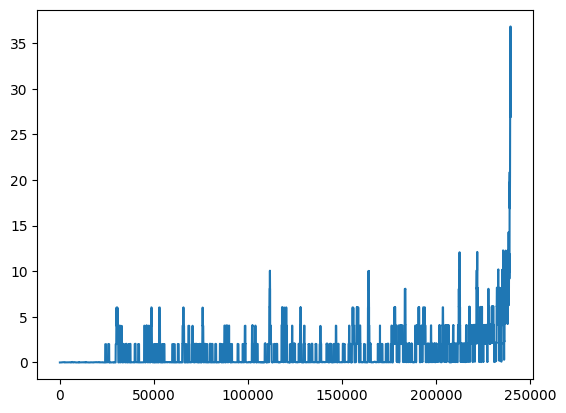

In [4]:
import matplotlib.pyplot as plt
reward_records = cur_res["reward_records"]
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 500:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-499:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
#plt.plot(reward_records)
plt.plot(average_reward)

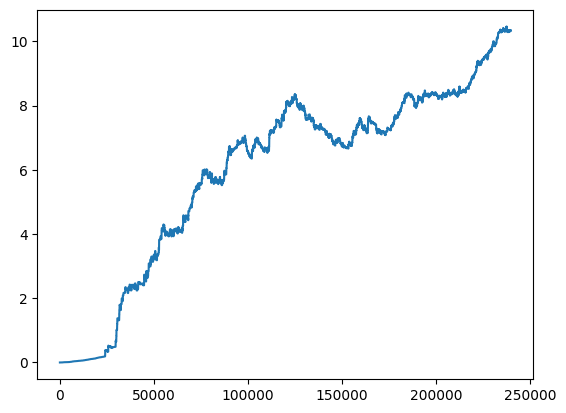

In [5]:
import matplotlib.pyplot as plt
exp_performances = cur_res["exp_performance"]
# Generate recent 50 interval average
avg_performances = []
for idx in range(len(exp_performances)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 500:
        avg_list = exp_performances[:idx+1]
    else:
        avg_list = exp_performances[idx-499:idx+1]
    avg_performances.append(np.average(avg_list))
# Plot
plt.plot(exp_performances)
#plt.plot(avg_performances)